In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read csv file into pandas DataFrame
skills_df = pd.read_csv('job_postings_data.csv', index_col=0)

In [3]:
skills_df.head(5)

,Job Tier,Job Type,Skill
0,Intermediate,Fixed-Price,Data Scraping
1,Intermediate,Fixed-Price,Web Scraping
2,Expert,Fixed-Price,Machine Learning
3,Intermediate,Fixed-Price,Appforfinance Financial Statement Analysis
4,Intermediate,Fixed-Price,Business Analysis


In [4]:
skills_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2186
Data columns (total 3 columns):
Job Tier    2187 non-null object
Job Type    2187 non-null object
Skill       2187 non-null object
dtypes: object(3)
memory usage: 68.3+ KB


-----------------------------------------------------

##Most sought-after skills on Upwork for Data Science and Analytics jobs

In [6]:
skills_df['Skill'].value_counts()[:60]

Microsoft Excel                        145
Data Mining                            106
Python                                  82
Data Entry                              81
Data Scraping                           74
Machine Learning                        69
Data Analytics                          64
Data Science                            56
Internet Research                       55
Web Scraping                            48
Data Visualization                      39
Statistics                              38
Excel VBA                               31
Analytics                               25
SQL                                     23
Quantitative Analysis                   22
Microsoft Power BI                      21
Mathematics                             20
Financial Analysis                      20
Tableau Software                        20
Data Extraction                         20
R                                       17
Research                                16
Lead Genera

-------------------------------

##Job 'Type' and 'Tier' for most tagged skills

###1 Microsoft Excel

In [7]:
skills_df[skills_df['Skill']=='Microsoft Excel']['Job Type'].value_counts()

Hourly         75
Fixed-Price    70
Name: Job Type, dtype: int64

In [8]:
skills_df[skills_df['Skill']=='Microsoft Excel']['Job Tier'].value_counts()

Intermediate    59
Entry           55
Expert          31
Name: Job Tier, dtype: int64

###2 Data Mining

In [9]:
skills_df[skills_df['Skill']=='Data Mining']['Job Type'].value_counts()

Hourly         57
Fixed-Price    49
Name: Job Type, dtype: int64

In [10]:
skills_df[skills_df['Skill']=='Data Mining']['Job Tier'].value_counts()

Entry           48
Intermediate    43
Expert          15
Name: Job Tier, dtype: int64

###3 Python

In [11]:
skills_df[skills_df['Skill']=='Python']['Job Type'].value_counts()

Hourly         43
Fixed-Price    39
Name: Job Type, dtype: int64

In [12]:
skills_df[skills_df['Skill']=='Data Mining']['Job Tier'].value_counts()

Entry           48
Intermediate    43
Expert          15
Name: Job Tier, dtype: int64

-----------------

##Most frequent skills for Entry Level jobs

In [13]:
skills_df[skills_df['Job Tier']=='Entry']['Skill'].value_counts()[:20]

Microsoft Excel             55
Data Mining                 48
Data Entry                  43
Internet Research           31
Data Scraping               24
Web Scraping                15
Python                      15
Data Analytics              12
Lead Generation              9
Data Extraction              8
Virtual Assistant            8
Data Science                 7
Research                     6
Excel VBA                    6
Financial Analysis           6
English                      5
Analytics                    5
Market Research              4
Foreign Exchange Trading     4
JavaScript                   3
Name: Skill, dtype: int64

##Most frequent skills for Intermediate Jobs

In [14]:
skills_df[skills_df['Job Tier']=='Intermediate']['Skill'].value_counts()[:20]

Microsoft Excel          59
Data Mining              43
Python                   43
Data Scraping            38
Machine Learning         37
Data Entry               32
Data Science             31
Data Analytics           30
Web Scraping             24
Statistics               18
Internet Research        17
Data Visualization       17
Excel VBA                13
Microsoft Power BI       13
Analytics                12
SQL                      12
R                        10
Mathematics               9
Tableau Software          8
Quantitative Analysis     8
Name: Skill, dtype: int64

##Most frequent skills for Expert jobs

In [15]:
skills_df[skills_df['Job Tier']=='Expert']['Skill'].value_counts()[:30]

Microsoft Excel                        31
Machine Learning                       29
Python                                 24
Data Analytics                         22
Data Visualization                     19
Data Science                           18
Statistics                             17
Data Mining                            15
Quantitative Analysis                  13
Excel VBA                              12
Data Scraping                          12
Tableau Software                       12
API Development                        10
"Extract, Transform and Load (ETL)"    10
SQL                                    10
Mathematics                             9
Deep Learning                           9
Web Scraping                            9
Artificial Intelligence                 8
PHP                                     8
Analytics                               8
Financial Analysis                      7
Financial Modeling                      7
TensorFlow                        

---------------

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Top 10 Frequent Skills

In [26]:
top = skills_df['Skill'].value_counts()[:10]
top_skills = top.index
top_count = top.values
top_df = skills_df[skills_df['Skill'].isin(list(top_skills))]

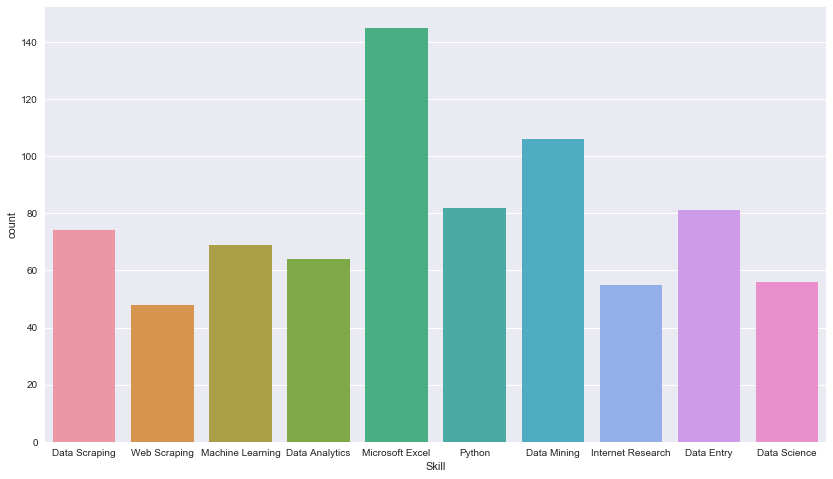

In [27]:
plt.figure(figsize=(14,8))
sns.countplot(top_df['Skill'])

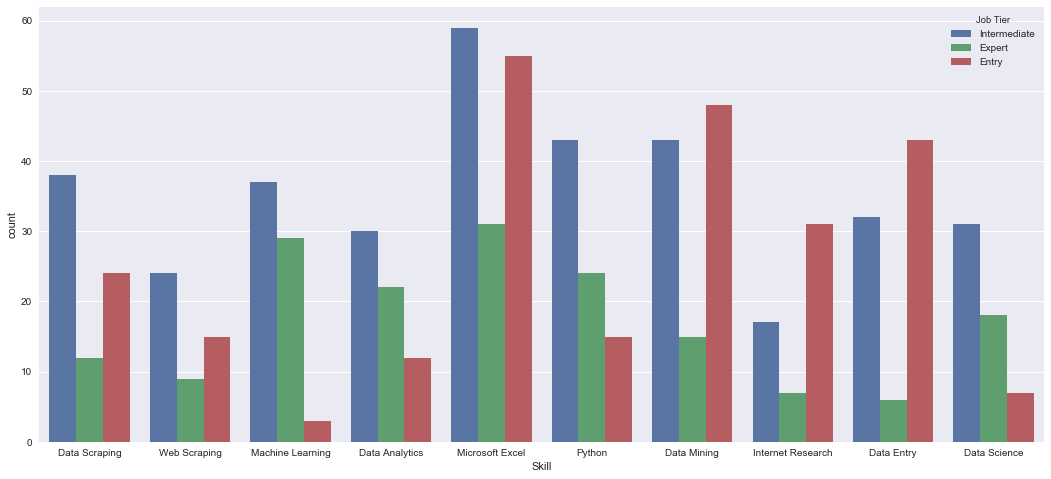

In [28]:
plt.figure(figsize=(18,8))
sns.countplot(top_df['Skill'], hue=top_df['Job Tier'])

In [29]:
s = top_df.loc[:,'Skill'].apply(lambda x: top[x])
top_df.loc[:,'Count Order'] = s

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
top_df.head()

,Job Tier,Job Type,Skill,Count Order
0,Intermediate,Fixed-Price,Data Scraping,74
1,Intermediate,Fixed-Price,Web Scraping,48
2,Expert,Fixed-Price,Machine Learning,69
6,Intermediate,Fixed-Price,Data Analytics,64
8,Intermediate,Fixed-Price,Microsoft Excel,145


In [59]:
top_df = top_df.sort_values(by=['Count Order','Skill'], ascending=[0,1])
top_df.head()

,Job Tier,Job Type,Skill,Count Order
8,Intermediate,Fixed-Price,Microsoft Excel,145
27,Intermediate,Fixed-Price,Microsoft Excel,145
31,Intermediate,Fixed-Price,Microsoft Excel,145
52,Entry,Hourly,Microsoft Excel,145
61,Expert,Fixed-Price,Microsoft Excel,145


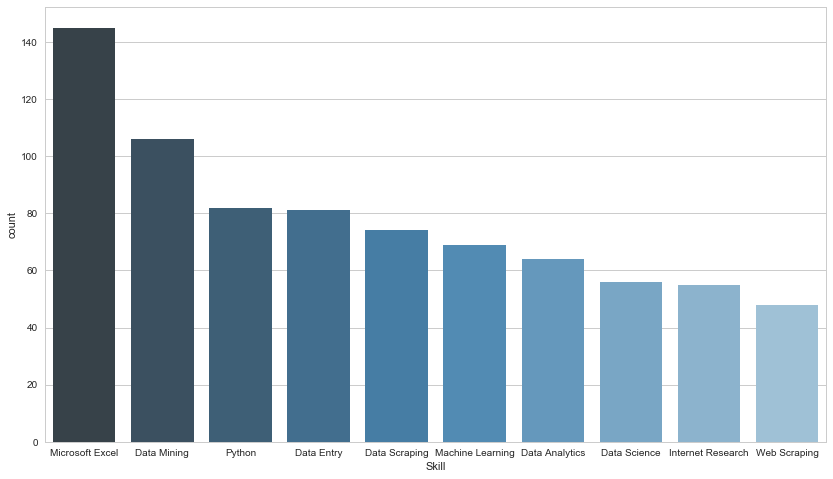

In [70]:
plt.figure(figsize=(14,8))
sns.set_style("whitegrid")
#sns.set_palette("Reds")
sns.countplot(top_df['Skill'], palette="Blues_d")

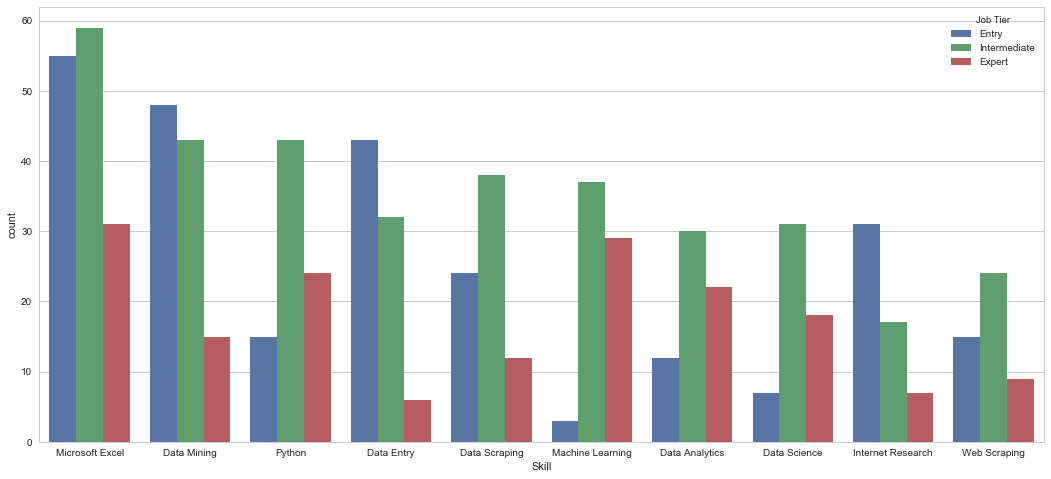

In [78]:
plt.figure(figsize=(18,8))
sns.countplot(top_df['Skill'], hue=top_df['Job Tier'], hue_order=['Entry', 'Intermediate', 'Expert'], palette="deep")